__Assignment 2__ <br>
Danil Redko <br>
1002572236


__Question 1__: Implement seam carving:

In [1]:
import numpy as np
import scipy as sp
import scipy.ndimage as ndimage
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.ndimage.filters import convolve
from scipy.ndimage.filters import gaussian_gradient_magnitude
from scipy.ndimage import sobel, generic_gradient_magnitude
from scipy import signal
from skimage.feature import peak_local_max
import math
import cv2

In [2]:
def my_plot(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [3]:
def G_M(grad):
    
    M = grad.copy()
    
    r,c = grad.shape
    
    for i in range(1, r):
        for j in range(0,c):
            if j<1:
                min_num = np.min(M[i-1, 0:2])
            else:
                min_num = np.min(M[i-1, j-1:j+2])
            
            M[i,j] = grad[i, j] + min_num      
    return M 

In [4]:
def find_path(M):
    
    min_arg = np.argmin(M[-1])
    
    delete_arg = []
    
    delete_arg.append([M.shape[0]-1, min_arg])
    
    
    for i in range(M.shape[0]-1, 0 ,-1):
         
        if min_arg < 1:

            min_arg = np.argmin(M[i-1, 0:2])
        else:
            min_arg = min_arg-1 + np.argmin(M[i-1, min_arg-1: min_arg+2])

        delete_arg.append([i-1, min_arg])
        
    return np.array(delete_arg)
    

In [5]:
def grad_mag(img):
    img = img.astype('float32')
    eng = generic_gradient_magnitude(img, sobel)
    #eng = gaussian_gradient_magnitude(img, 2)
    return eng

In [6]:
def find_seam(image):
   
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image_grad = grad_mag(image)
    M = G_M(image_grad)
    delete_arg = find_path(M)
    
    return delete_arg

In [7]:
def plot_seam(image, delete_arg):
    plt.plot(delete_arg[:,[0]] ,delete_arg[:,[1]], c='red')
    #plt.imshow(image)
    #plt.show()

In [8]:
def remove_seam(delete_arg, img):
    r,c, _ = img.shape
    i = 0
    mask = np.ones(img.shape, dtype=bool)
    for j in delete_arg[:,[1]]:
        mask[i, j[0], :]=False
        i+=1
    img = img[mask]
    return img.reshape(r,c-1,3)

In [9]:
def get_new_image(image1rbg):
    
    delete_arg = find_seam(image1rbg)
    
    plot_seam(image1rbg, delete_arg)
    
    return remove_seam(delete_arg, image1rbg)
    

In [10]:
def delete_columns(img, n):
    for i in range(n):
        new_image = get_new_image(img)
        img = new_image
    return img

In [11]:
image1 = cv2.imread('image1.jpg', 0)
image1rbg = cv2.imread('image1.jpg', 1)[:,:,::-1]

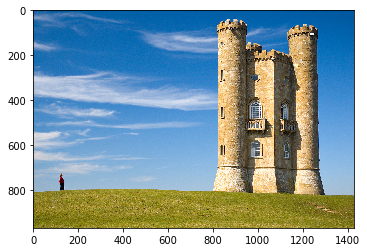

In [12]:
new_image=delete_columns(image1rbg, 10)
plt.imshow(image1rbg)

In [13]:
print(image1rbg.shape) # shape before

(968, 1428, 3)


In [14]:
print(new_image.shape) #shape after

(968, 1418, 3)


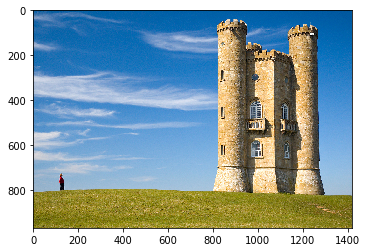

In [15]:
plt.imshow(new_image) # plot new image

__[Question 2]__ 

Implement a function to perform Harris corner detection.

In [ ]:
def find_corner(img, alpha, threshold):
    
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img = ndimage.filters.gaussian_filter(img, 1)
    
    r, c = img.shape
    
    img2 = np.zeros((r,c))
    
    dy, dx = np.gradient(img)
    
    Ixx = np.square(dx)
    
    Iyy = np.square(dy)
    
    Ixy = dy * dx
    
    
    #Ixx = ndimage.filters.gaussian_filter(Ixx,1)
    #Iyy = ndimage.filters.gaussian_filter(Iyy,1)
    #Ixy = ndimage.filters.gaussian_filter(Ixy,1)
    
    for y in range(1, r):
        for x in range(1,c):
            
            wIxx = Ixx[y-1:y+1,x-1:x+1].sum()
            wIyy = Iyy[y-1:y+1,x-1:x+1].sum()
            wIxy = Ixy[y-1:y+1,x-1:x+1].sum()
            
            traceM = wIxx + wIyy
            
            detM = wIxx*wIyy - wIxy*wIxy
            
            R = detM - alpha*(traceM**2)
            
            if R > threshold:
                
                img2[y,x]=R
            
            
    return img2

    
    
    

In [ ]:
image4 = cv2.imread('image4.png', 1)

In [ ]:
def show_corners(img, min_dist, thres, alpha):
    
    img2 = find_corner(img, alpha, thres)
    
    coordinates = peak_local_max(img2, min_dist, thres)
    
    plt.imshow(img, cmap='gray')
    
    plt.scatter(coordinates[:, 1], coordinates[:, 0], c='r')
    
    plt.show()

In [ ]:
show_corners(image4, 30, 1000, 0.05)

In [ ]:
for i in range(100,10000,20):
    for j in range(10,100, 5):
        print(i,j)
        show_corners(image4, j, i, 0.05)